# Exercise 18

## Analyze class homeworks


In [1]:
!pip install fuzzywuzzy

In [2]:
import pandas as pd
import numpy as np
from fuzzywuzzy import fuzz
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.corpus import stopwords

%matplotlib inline
import matplotlib.pyplot as plt

data = pd.read_excel('E18.xlsx')
data.head()

C:\Users\ivandario.gomez\AppData\Local\Continuum\anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


,Sexo,T1,T2,T3,T4,T5,T6
0,H,Un científico de datos y un ingeniero de datos...,NaN,Los árboles de decisión es uno de los algoritm...,NaN,"En el documento ""Do We Need Hundreds of Classi...",Boosting builds models from individual so call...
1,H,Aunque los dos perfiles cuentan con habilidade...,Aunque el conceso no es total en el tema de ma...,NaN,En Machine Learing el propósito de los métodos...,El paper publicado en 2014 hace una evaluación...,Gradient Boosting ClassifierGradient Boosting ...
2,H,Python vs Stata. Analizar información es un pr...,En el marco del Machine Learning encontramos c...,Árbol de clasificación Como su nombre lo indic...,Este es un mecanismo que utiliza varios algori...,El paper analiza 179 clasificadores de 17 dife...,Gradient Boosting Classifier busca aprender de...
3,M,Los algoritmos de machine learning buscan pred...,Los algoritmos de machine learning buscan pred...,Los arboles de decisión pertenecen a los algor...,Consideremos el siguiente ejemplo: Una persona...,¿Se necesitan cientos de modelos para resolver...,NaN
4,H,Python vs R para análisis de datos. A pesar de...,Tipos de aprendizaje en Machine Learning. El M...,Tipos de árboles de decisión y aplicaciones. U...,La combinación de modelos o ensemble es un mod...,En el articulo se analizan cerca de 180 clasif...,XGBoosting vs GBoosting. A pesar de que el alg...


# Exercise 18.1

Analyze the writing patterns of each student

In [3]:
data['cant_docs'] = data.notna().sum(axis=1)
data.head()

,Sexo,T1,T2,T3,T4,T5,T6,cant_docs
0,H,Un científico de datos y un ingeniero de datos...,NaN,Los árboles de decisión es uno de los algoritm...,NaN,"En el documento ""Do We Need Hundreds of Classi...",Boosting builds models from individual so call...,5
1,H,Aunque los dos perfiles cuentan con habilidade...,Aunque el conceso no es total en el tema de ma...,NaN,En Machine Learing el propósito de los métodos...,El paper publicado en 2014 hace una evaluación...,Gradient Boosting ClassifierGradient Boosting ...,6
2,H,Python vs Stata. Analizar información es un pr...,En el marco del Machine Learning encontramos c...,Árbol de clasificación Como su nombre lo indic...,Este es un mecanismo que utiliza varios algori...,El paper analiza 179 clasificadores de 17 dife...,Gradient Boosting Classifier busca aprender de...,7
3,M,Los algoritmos de machine learning buscan pred...,Los algoritmos de machine learning buscan pred...,Los arboles de decisión pertenecen a los algor...,Consideremos el siguiente ejemplo: Una persona...,¿Se necesitan cientos de modelos para resolver...,NaN,6
4,H,Python vs R para análisis de datos. A pesar de...,Tipos de aprendizaje en Machine Learning. El M...,Tipos de árboles de decisión y aplicaciones. U...,La combinación de modelos o ensemble es un mod...,En el articulo se analizan cerca de 180 clasif...,XGBoosting vs GBoosting. A pesar de que el alg...,7


In [4]:
# words average for each student
data['average_c'] = 0
data['average_w'] = 0
for i in data.index:
    average_c = 0
    average_w = 0
    for j in range(1,7):
        try:
            #print(len(data.iloc[i][j]))
            average_c = average_c + len(data.iloc[i][j])
            average_w = average_w + len(data.iloc[i][j].split())
        except:
            pass
    #print(i,"_________________________")
    data['average_c'][i] =  average_c / data['cant_docs'][i]
    data['average_w'][i] =  average_w / data['cant_docs'][i]
data.head()   

C:\Users\ivandario.gomez\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\ivandario.gomez\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,Sexo,T1,T2,T3,T4,T5,T6,cant_docs,average_c,average_w
0,H,Un científico de datos y un ingeniero de datos...,NaN,Los árboles de decisión es uno de los algoritm...,NaN,"En el documento ""Do We Need Hundreds of Classi...",Boosting builds models from individual so call...,5,2314,369
1,H,Aunque los dos perfiles cuentan con habilidade...,Aunque el conceso no es total en el tema de ma...,NaN,En Machine Learing el propósito de los métodos...,El paper publicado en 2014 hace una evaluación...,Gradient Boosting ClassifierGradient Boosting ...,6,1418,220
2,H,Python vs Stata. Analizar información es un pr...,En el marco del Machine Learning encontramos c...,Árbol de clasificación Como su nombre lo indic...,Este es un mecanismo que utiliza varios algori...,El paper analiza 179 clasificadores de 17 dife...,Gradient Boosting Classifier busca aprender de...,7,1586,253
3,M,Los algoritmos de machine learning buscan pred...,Los algoritmos de machine learning buscan pred...,Los arboles de decisión pertenecen a los algor...,Consideremos el siguiente ejemplo: Una persona...,¿Se necesitan cientos de modelos para resolver...,NaN,6,1597,244
4,H,Python vs R para análisis de datos. A pesar de...,Tipos de aprendizaje en Machine Learning. El M...,Tipos de árboles de decisión y aplicaciones. U...,La combinación de modelos o ensemble es un mod...,En el articulo se analizan cerca de 180 clasif...,XGBoosting vs GBoosting. A pesar de que el alg...,7,1463,238


# Distribution of number of documents per person

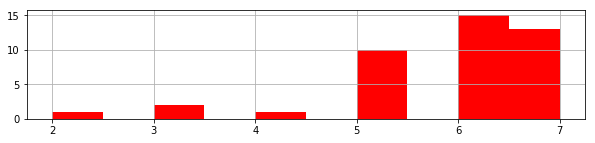

In [94]:
data['cant_docs'].hist(color = "red", figsize=(10,2))

# Distribution of number of words per document

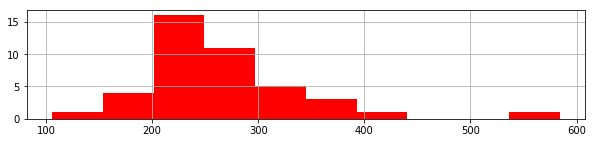

In [93]:
data['average_w'].hist(color = "red", figsize=(10,2))

# Distribution of number of characters per document

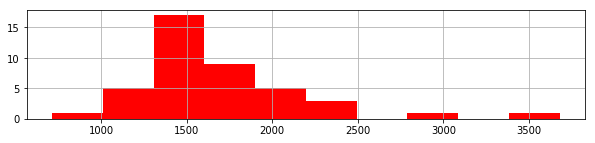

In [92]:
data['average_c'].hist(color = "red", figsize=(10,2))

# Ranking of average words in document per person

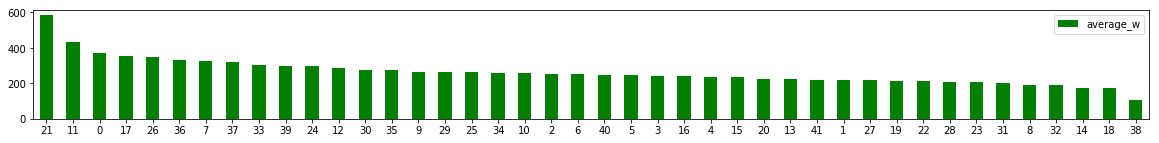

In [89]:
data[['average_w']].sort_values('average_w',ascending=False).plot(kind = "bar",figsize=(20,2),rot = 0, color = "green")


# Ranking sum of documents per person

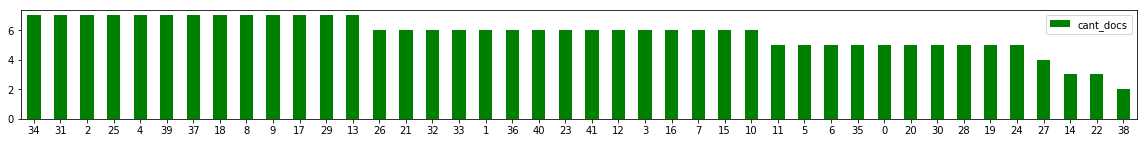

In [90]:
data[['cant_docs']].sort_values('cant_docs',ascending=False).plot(kind = "bar",figsize=(20,2),rot = 0, color = "green")

# Exercise 18.2

Evaluate the similarities of the homeworks of the students

tip: https://github.com/orsinium/textdistance

In [10]:
T1 = pd.DataFrame(data.T1)
T2 = pd.DataFrame(data.T2)
T3 = pd.DataFrame(data.T3)
T4 = pd.DataFrame(data.T4)
T5 = pd.DataFrame(data.T5)
T6 = pd.DataFrame(data.T6)

In [11]:
T1.fillna('nan', inplace=True)
T2.fillna('nan', inplace=True)
T3.fillna('nan', inplace=True)
T4.fillna('nan', inplace=True)
T5.fillna('nan', inplace=True)
T6.fillna('nan', inplace=True)

In [12]:
stpw = stopwords.words('spanish')
stpw.append('nan')

In [13]:
tf = TfidfVectorizer(ngram_range=(1,5), stop_words=stpw)

In [20]:
def similarity(data, column):
    results = pd.DataFrame(0, index=data.index, columns=data.index)
    for txt in data[column].iteritems():
        for line in data[column].iteritems():
            results[txt[0]][line[0]]=fuzz.ratio(txt[1],line[1])
            
    assert results.shape == (data.shape[0], data.shape[0])
    return results

In [21]:
t1_ = similarity(T1, 'T1')
t2_ = similarity(T2, 'T2')
t3_ = similarity(T3, 'T3')
t4_ = similarity(T4, 'T4')
t5_ = similarity(T5, 'T5')
t6_ = similarity(T6, 'T6')

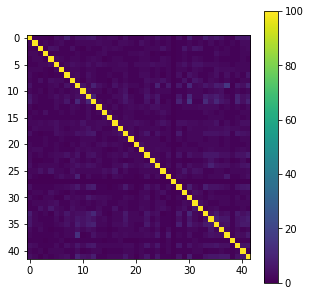

In [124]:
plt.figure(figsize=(5,5))
plt.imshow(t1_);
plt.colorbar()
plt.show()

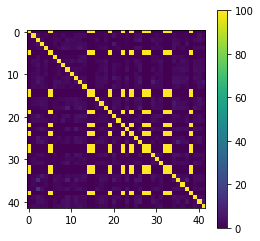

In [113]:
plt.figure(figsize=(4,4))
plt.imshow(t2_);
plt.colorbar()
plt.show()

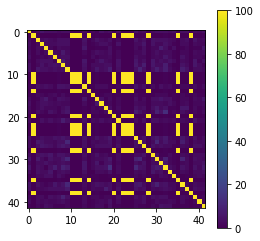

In [114]:
plt.figure(figsize=(4,4))
plt.imshow(t3_);
plt.colorbar()
plt.show()

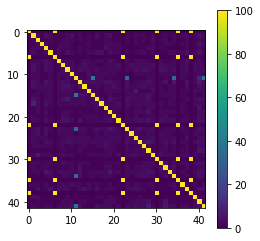

In [115]:
plt.figure(figsize=(4,4))
plt.imshow(t4_);
plt.colorbar()
plt.show()

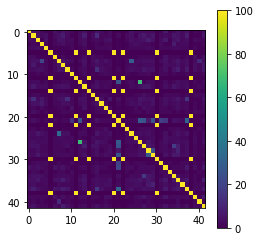

In [116]:
plt.figure(figsize=(4,4))
plt.imshow(t5_);
plt.colorbar()
plt.show()

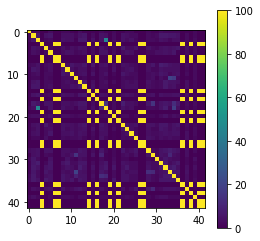

In [117]:
plt.figure(figsize=(4,4))
plt.imshow(t6_);
plt.colorbar()
plt.show()

# Exercise 18.3

Create a classifier to predict the sex of each student



In [28]:
data.Sexo.value_counts()

H    34
M     8
Name: Sexo, dtype: int64

In [29]:
data_ = data.fillna('Vacío')
data_['TT'] = data_['T1'].str.cat(data_['T2'].str.cat(data_['T3'].str.cat(data_['T4'].str.cat(data_['T5'].str.cat(data_['T6'],sep=" "),sep=" "),sep=" "),sep=" "),sep=" ")

In [30]:
Sexo_ = pd.Series(pd.Categorical(data.Sexo).codes).tolist()

In [31]:
data_['Sexo_'] = Sexo_

In [32]:
data_.Sexo.value_counts()

H    34
M     8
Name: Sexo, dtype: int64

In [33]:
data_.Sexo_.value_counts()

0    34
1     8
Name: Sexo_, dtype: int64

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
data_.head()

,Sexo,T1,T2,T3,T4,T5,T6,cant_docs,average_c,average_w,TT,Sexo_
0,H,Un científico de datos y un ingeniero de datos...,Vacío,Los árboles de decisión es uno de los algoritm...,Vacío,"En el documento ""Do We Need Hundreds of Classi...",Boosting builds models from individual so call...,5,2314,369,Un científico de datos y un ingeniero de datos...,0
1,H,Aunque los dos perfiles cuentan con habilidade...,Aunque el conceso no es total en el tema de ma...,Vacío,En Machine Learing el propósito de los métodos...,El paper publicado en 2014 hace una evaluación...,Gradient Boosting ClassifierGradient Boosting ...,6,1418,220,Aunque los dos perfiles cuentan con habilidade...,0
2,H,Python vs Stata. Analizar información es un pr...,En el marco del Machine Learning encontramos c...,Árbol de clasificación Como su nombre lo indic...,Este es un mecanismo que utiliza varios algori...,El paper analiza 179 clasificadores de 17 dife...,Gradient Boosting Classifier busca aprender de...,7,1586,253,Python vs Stata. Analizar información es un pr...,0
3,M,Los algoritmos de machine learning buscan pred...,Los algoritmos de machine learning buscan pred...,Los arboles de decisión pertenecen a los algor...,Consideremos el siguiente ejemplo: Una persona...,¿Se necesitan cientos de modelos para resolver...,Vacío,6,1597,244,Los algoritmos de machine learning buscan pred...,1
4,H,Python vs R para análisis de datos. A pesar de...,Tipos de aprendizaje en Machine Learning. El M...,Tipos de árboles de decisión y aplicaciones. U...,La combinación de modelos o ensemble es un mod...,En el articulo se analizan cerca de 180 clasif...,XGBoosting vs GBoosting. A pesar de que el alg...,7,1463,238,Python vs R para análisis de datos. A pesar de...,0


In [36]:
y = data_.Sexo_
X = data_.drop(['Sexo_', 'Sexo', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6'], axis=1)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=17)

In [38]:
y_test.value_counts()

0    10
1     1
Name: Sexo_, dtype: int64

In [39]:
X = pd.concat([X_train, y_train], axis=1)

In [40]:
Hombres = X[X.Sexo_==0]
Mujeres = X[X.Sexo_==1]

In [49]:
!pip install sklearn.utils.resample

  Could not find a version that satisfies the requirement sklearn.utils.resample (from versions: )
No matching distribution found for sklearn.utils.resample


In [61]:
from sklearn.utils import resample

Mujeres_upsampled = resample(Mujeres,
                          replace=True,
                          n_samples=len(Hombres),
                          random_state=17)

In [62]:
upsampled = pd.concat([Hombres, Mujeres_upsampled])

In [63]:
upsampled.Sexo_.value_counts()

1    24
0    24
Name: Sexo_, dtype: int64

In [64]:
y_train = upsampled.Sexo_
X_train = upsampled.drop('Sexo_', axis=1)

In [65]:
X_train.head()

,cant_docs,average_c,average_w,TT
30,5,1707,276,Las diferencias entre un científico de datos y...
41,6,1429,220,Aunque un científico de datos y un ingeniero d...
12,6,1859,284,Diferencias entre los científicos de datos y l...
25,7,1638,265,Python vs R vs SAS for Data Science. Cuando se...
35,5,1844,275,Un ingeniero de datos está encargado de la inf...


In [66]:
y_train.head()

30    0
41    0
12    0
25    0
35    0
Name: Sexo_, dtype: int64

In [67]:
tf_ = TfidfVectorizer(ngram_range=(1,5), stop_words=stpw)

In [68]:
tf_.fit(data_.TT)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 5), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde'...mos', 'tuvieseis', 'tuviesen', 'teniendo', 'tenido', 'tenida', 'tenidos', 'tenidas', 'tened', 'nan'],
        strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [69]:
X_train_ = tf_.transform(X_train.TT)
X_train_ = pd.DataFrame(X_train_.todense(), columns=tf_.get_feature_names())

In [70]:
X_test_ = tf_.transform(X_test.TT)
X_test_ = pd.DataFrame(X_test_.todense(), columns=tf_.get_feature_names())

In [71]:
c_docs = X_train.cant_docs.tolist()
avg_c = X_train.average_c.tolist()
avg_w = X_train.average_w.tolist()

c_docst = X_test.cant_docs.tolist()
avg_ct = X_test.average_c.tolist()
avg_wt = X_test.average_w.tolist()

In [72]:
X_train_['c_docs'] = c_docs
X_train_['avg_c'] = avg_c
X_train_['avg_w'] = avg_w

X_test_['c_docs'] = c_docst
X_test_['avg_c'] = avg_ct
X_test_['avg_w'] = avg_wt

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
clf = RandomForestClassifier(random_state=17, n_jobs=-1)

In [75]:
clf.fit(X_train_, y_train)

C:\Users\ivandario.gomez\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=17, verbose=0, warm_start=False)

In [77]:
from sklearn.metrics import accuracy_score
accuracy_score(clf.predict(X_test_), y_test)

0.8181818181818182

In [79]:
from sklearn.metrics import roc_auc_score
roc_auc_score(clf.predict(X_test_), y_test)

0.45